# Text Analysis
Reference: 
http://www.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html

http://sebastianraschka.com/Articles/2014_twitter_wordcloud.html#b-creating-the-word-cloud-b-creating-the-word-cloud


http://www.nltk.org/book/ch03.html


In [43]:
#pip install git+git://github.com/amueller/word_cloud.git



The following command must be run outside of the IPython shell:

    $ pip install git+git://github.com/amueller/word_cloud.git

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


In [22]:



from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from nltk import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
import nltk
import string

from urllib.request import urlopen 
import re                                                                                                                
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

## Reading data from the Web

In [12]:
little_women_url = 'http://www.gutenberg.org/cache/epub/35534/pg35534.txt'
little_women_text = read_url(little_women_url)
chapters = little_women_text.split('CHAPTER ')[1:]

In [ ]:
Question, could you make the program read the data from disk?

In [13]:
#printing the first 1000 words of the book
little_women_text[:1000]

'\ufeffProject Gutenberg\'s How to be Happy Though Married, by Edward John Hardy This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org Title: How to be Happy Though Married Being a Handbook to Marriage Author: Edward John Hardy Release Date: March 9, 2011 [EBook #35534] Language: English *** START OF THIS PROJECT GUTENBERG EBOOK HOW TO BE HAPPY THOUGH MARRIED *** Produced by Colin Bell, Christine P. Travers and the Online Distributed Proofreading Team at http://www.pgdp.net (This file was produced from images generously made available by The Internet Archive) [Transcriber\'s note: The author\'s spelling has been maintained. + signs around words indicate the use of a different font in the book. In the word "Puranic", the "a" is overlined in the book.] _HOW TO BE HAPPY THOUGH MARRIED._ PRESS NOTIC

## Tokenization

In [31]:
import nltk
import string

from collections import Counter

nopunctuation = little_women_text.lower()
#remove the punctuation using the character deletion step of translate
little_women_text_with_noPun = nopunctuation.translate(string.punctuation)

tokens = nltk.word_tokenize(little_women_text_with_noPun)
#type(tokens)
#len(tokens)

tokens[:10]



['\ufeffproject',
 'gutenberg',
 "'s",
 'how',
 'to',
 'be',
 'happy',
 'though',
 'married',
 ',']

In [32]:

count = Counter(tokens)
#print count.most_common(10)




## Remove Stopwords 

In [33]:

filtered = [w for w in tokens if not w in stopwords.words('english')]
count = Counter(filtered)
most_common10 = count.most_common(10)
most_common10

[(',', 6753),
 ('.', 4065),
 ("''", 1423),
 ('``', 1396),
 ('*', 820),
 (';', 741),
 ('--', 569),
 ("'s", 418),
 ('one', 355),
 ('wife', 354)]

## WordCloud generator

In [44]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(
                      font_path='/Users/sebastian/Library/Fonts/CabinSketch-Bold.ttf',
                      stopwords=STOPWORDS,
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(filtered)

plt.imshow(wordcloud)
plt.axis('off')

ModuleNotFoundError: No module named 'wordcloud'

## Insight about the book

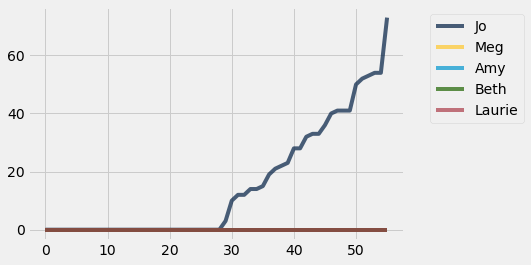

In [45]:
Table().with_columns([
    "Jo",   np.char.count(chapters, "Jo"),
    "Meg",  np.char.count(chapters, "Meg"),
    "Amy",  np.char.count(chapters, "Amy"),
    "Beth", np.char.count(chapters, "Beth"),
    "Laurie", np.char.count(chapters, "Laurie")
]).cumsum().plot(overlay=True)

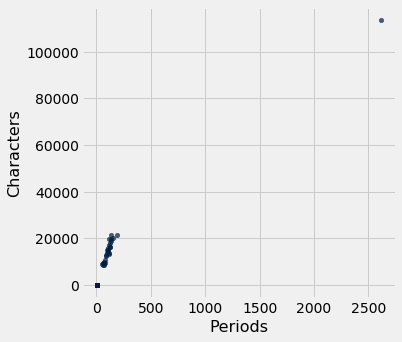

In [46]:
Table().with_columns([
        "Characters", [len(c) for c in chapters],
        "Periods", np.char.count(chapters, "."),
    ]).scatter('Periods')